In [8]:
"""
# LeBron James Shot Prediction (2024–25)
This notebook analyzes LeBron James's shot data from the 2024–25 NBA season.

Goals:
- Explore shot distributions and accuracy by location
- Visualize shot frequency and field goal %
- Build a machine learning model to predict shot success
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning later
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load cleaned data
df = pd.read_csv("C:/Users/BC-Tech/Documents/Chibueze's Personal Coding Projects/Personal-Projects-1/basketball-shot-predictor/data/processed/lebron_shots_cleaned_2024_25.csv")


In [9]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GAME_ID              1270 non-null   int64 
 1   GAME_DATE            1270 non-null   object
 2   PERIOD               1270 non-null   int64 
 3   MINUTES_REMAINING    1270 non-null   int64 
 4   SECONDS_REMAINING    1270 non-null   int64 
 5   SHOT_DISTANCE        1270 non-null   int64 
 6   LOC_X                1270 non-null   int64 
 7   LOC_Y                1270 non-null   int64 
 8   SHOT_ZONE_BASIC      1270 non-null   object
 9   ACTION_TYPE          1270 non-null   object
 10  SHOT_TYPE            1270 non-null   object
 11  SHOT_ATTEMPTED_FLAG  1270 non-null   int64 
 12  SHOT_MADE_FLAG       1270 non-null   int64 
 13  LATE_GAME            1270 non-null   int64 
 14  THREE_POINT_SHOT     1270 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 149.0+ KB


,GAME_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,LATE_GAME,THREE_POINT_SHOT
count,1.270000e+03,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.0,1270.000000,1270.000000,1270.000000
mean,2.240058e+07,2.599213,6.100000,29.011024,12.949606,-16.214961,102.385827,1.0,0.512598,0.062205,0.311811
std,3.424174e+02,1.125323,3.671746,16.962292,10.562090,92.255753,99.835006,0.0,0.500038,0.241622,0.463416
min,2.240002e+07,1.000000,0.000000,0.000000,0.000000,-244.000000,-32.000000,1.0,0.000000,0.000000,0.000000
25%,2.240030e+07,2.000000,2.000000,15.000000,3.000000,-64.750000,17.000000,1.0,0.000000,0.000000,0.000000
50%,2.240058e+07,3.000000,7.000000,29.000000,11.000000,-7.000000,54.000000,1.0,1.000000,0.000000,0.000000
75%,2.240085e+07,4.000000,9.000000,44.000000,25.000000,19.000000,196.750000,1.0,1.000000,0.000000,1.000000
max,2.240122e+07,5.000000,11.000000,59.000000,67.000000,250.000000,667.000000,1.0,1.000000,1.000000,1.000000


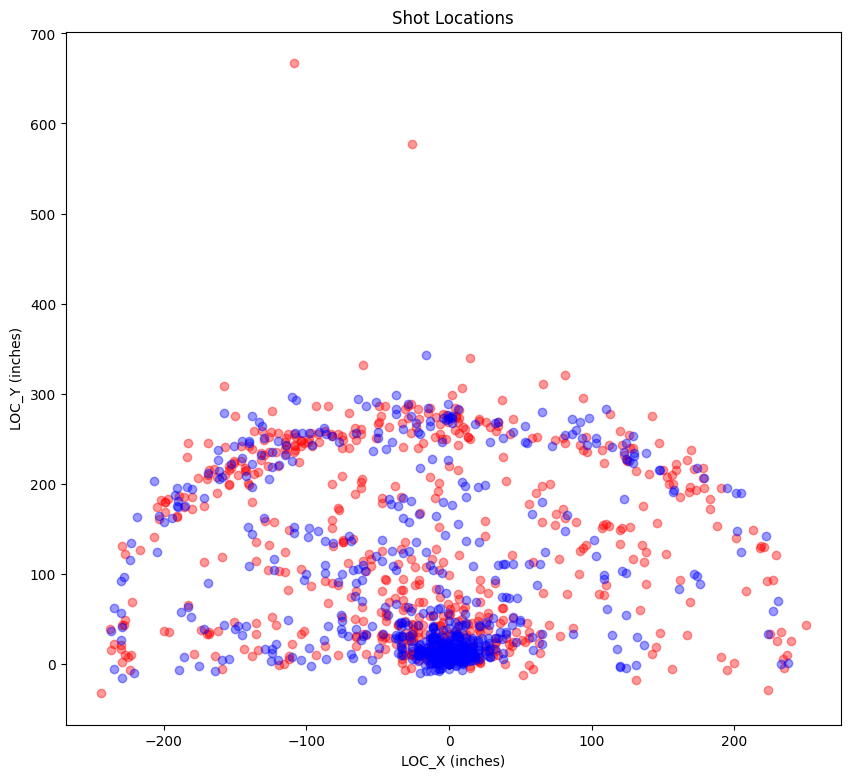

In [ ]:
#To visualize the shot locations, we will plot the x and y coordinates of each shot.
# The x and y coordinates represent the location of the shot on the court.
# Separate made and missed shots
made_shots = df[df['SHOT_MADE_FLAG'] == 1]
missed_shots = df[df['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(10, 9))

# Plot missed shots in red
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', alpha=0.4, label='Missed Shot')

# Plot made shots in blue
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='blue', alpha=0.4, label='Made Shot')

plt.title('Shot Locations')
plt.xlabel('LOC_X (inches)')
plt.ylabel('LOC_Y (inches)')
plt.show()

In [10]:
print("Total shot attempts:", len(df))

Total shot attempts: 1270


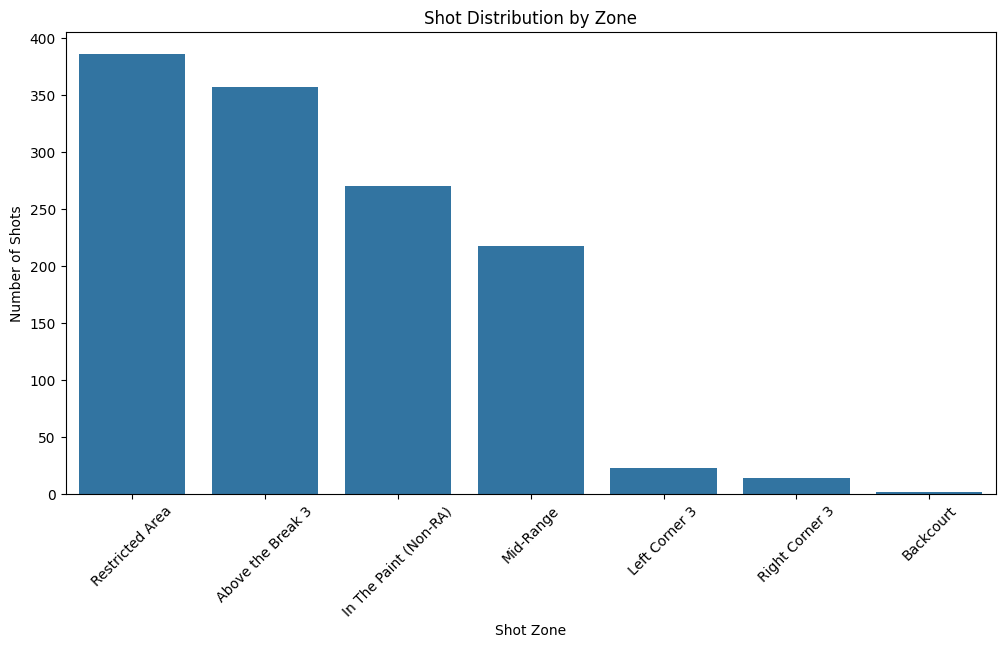

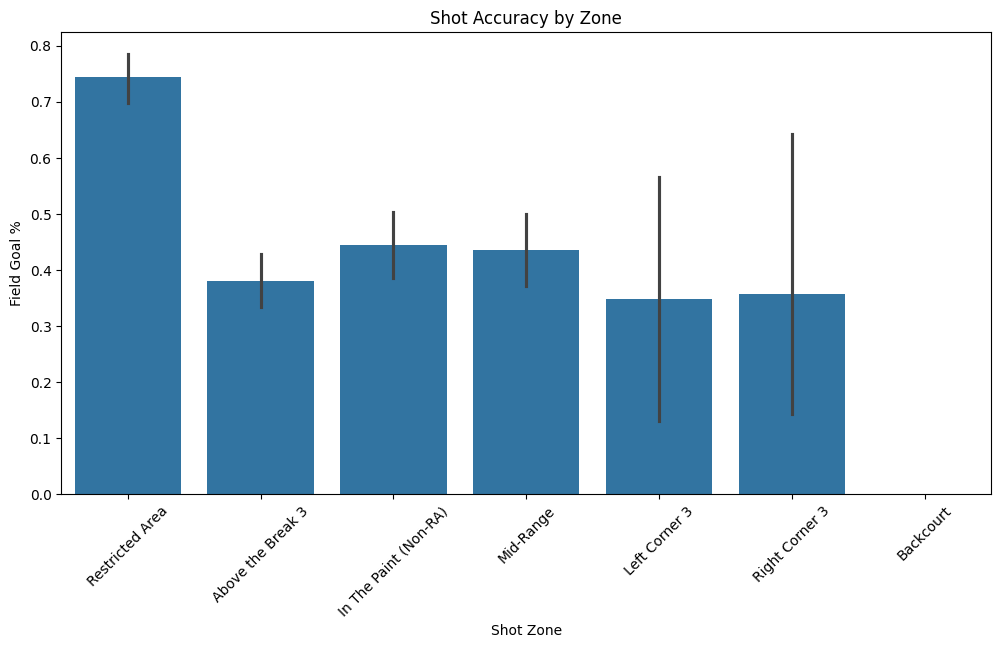

In [ ]:
df['SHOT_ZONE_BASIC'].value_counts()
# Visualize shot distribution by zone
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='SHOT_ZONE_BASIC', order=df['SHOT_ZONE_BASIC'].value_counts().index)
plt.title('Shot Distribution by Zone')
plt.xticks(rotation=45)
plt.xlabel('Shot Zone')
plt.ylabel('Number of Shots')
plt.show()

df['SHOT_MADE_FLAG'].value_counts()
# Visualize shot accuracy by zone
plt.figure(figsize=(12, 6))
# the average field goal percentage by shot zone is calculated by grouping the data by 'SHOT_ZONE_BASIC' and taking the mean of 'SHOT_MADE_FLAG'
sns.barplot(data=df, x='SHOT_ZONE_BASIC', y='SHOT_MADE_FLAG', order=df['SHOT_ZONE_BASIC'].value_counts().index)
plt.title('Shot Accuracy by Zone')  
plt.xticks(rotation=45)
plt.xlabel('Shot Zone')
plt.ylabel('Field Goal %')
plt.show()